## Imports

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [31]:
df = pd.read_csv("./DATA/AMES_Final_DF.csv")

In [32]:
df.head()

,Unnamed: 0,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,False,True,False,False,False,True,False
2,2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,False,True,False,False,False,True,False


In [33]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,False,False,False,False,True,False,False,False,True,False
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,False,False,False,False,True,False,False,False,True,False
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,False,False,False,False,True,False,False,False,True,False
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,False,False,False,False,True,False,False,False,True,False
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,False,False,False,False,True,False,False,False,True,False


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 263 entries, Lot Frontage to Sale Condition_Partial
dtypes: bool(227), float64(11), int64(25)
memory usage: 1.4 MB


## ML Model - Data Preparation

### Splitting of Features and Targets

In [35]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

### Train-Test Split

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

### Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Utilizing ElasticNet for Model Training

In [38]:
from sklearn.linear_model import ElasticNet

In [39]:
base_elastic_model = ElasticNet(max_iter=10000)

### Hyperparameters and Grid Search

In [40]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [41]:
from sklearn.model_selection import GridSearchCV

grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.220e+10, tolerance: 1.346e+09
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [42]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

## Prediction on Test Dataset and Model Evaluation

In [43]:
y_pred = grid_model.predict(scaled_X_test)

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [45]:
mean_absolute_error(y_test,y_pred)

14218.352387671826

In [46]:
np.sqrt(mean_squared_error(y_test,y_pred))

20619.576870342884

In [47]:
np.mean(df['SalePrice'])

180815.53743589742

## Saving the Model as .pkl File

In [48]:
import joblib
joblib.dump(grid_model,'./DATA/hse_price_pred_model.pkl')

['./DATA/hse_price_pred_model.pkl']

## Model Interpretation and Explanation using SHAP

In [51]:
import shap

best_model = grid_model.best_estimator_

explainer = shap.Explainer(best_model, scaled_X_train, feature_names=X.columns)
shap_values = explainer(scaled_X_test)

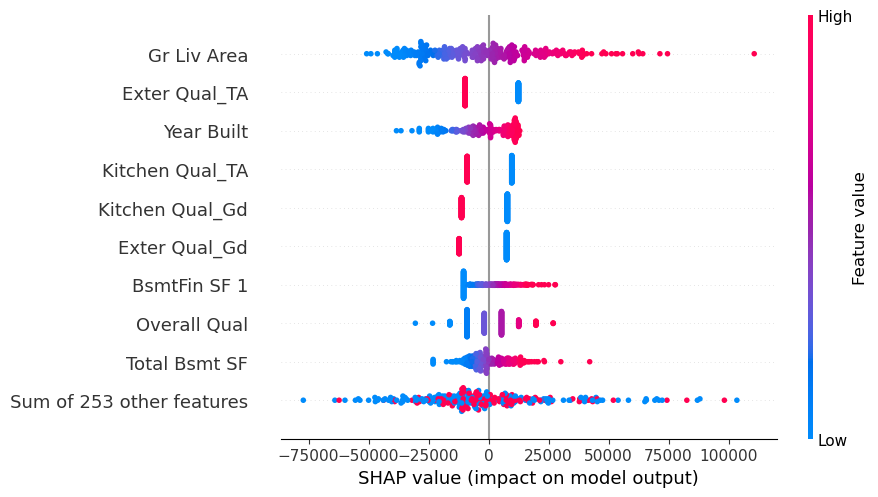

In [52]:
shap.plots.beeswarm(shap_values)

This plot, uses the SHAP value (impact on model output) on the X-axis, with features on y-axis.
The plot shows the variables that are most important to the model: Gr Liv Area, as is obvious: greater living area in the house, greater the price. 
External Qual TA, ranks a close second. As a categorical variable, its negativity and positivity also shows an impact on the model. 

The variables having the most impact: 
* Gr Liv Area (Above grade (ground) living area square feet)
* Exter Qual_TA (The material on the exterior being of typical/average quality)
* Year Built
* Kitchen_Qual_TA (The kitchen material being of average/typical quaality)
* Kitchen Qual_GD (The kitchen material being of good quality)
* Exter Qual_GD (The exterior's material being of good quality)
* BsmtFin SF1 (Type 1 finished square feet)
* Overall Quality
* Total Basement area in Square Feet

This essentially means, that the following key parameters decide the price of the house: overall quality, the living area above ground, the exterior of the house and its quality of material, the basement area, and kitchen material's quality grade.  